# Data Set Details:
- Date: The date in format dd/mm/yyyy.
- Time: The time in format hh:mm:ss.
- Global active power: The household global minute-averaged active power (in kilowatt).
- Global reactive power: The household global minute-averaged reactive power (in kilowatt).
- Voltage: The minute-averaged voltage (in volt).
- Global intensity: The household global minute-averaged current intensity (in ampere).
- Sub-metering measurements: There are three sub-metering measurements, each of which corresponds to a different appliance or - group of appliances in the house. The first sub-metering measurement corresponds to the kitchen, the second sub-metering measurement corresponds to the laundry room, and the third sub-metering measurement corresponds to an electric water heater and an air conditioner.

- Our target variable is the Global Active Power !

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
# using the fivethirtyeight style for plots appearance
plt.style.use('fivethirtyeight')

# Specify the file path
file_path = "../data/household_power_consumption.txt"

# Read the text file into a DataFrame
df = pd.read_csv(file_path, delimiter=";")  # Assuming semicolon-separated values

# Display the DataFrame
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


C:\Users\pc\AppData\Local\Temp\ipykernel_10436\2146137032.py:8: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=";")  # Assuming semicolon-separated values


In [156]:
# Compute the sum of missing values in each column
na_sum = df.isna().sum()

# Display the sum of missing values
print(na_sum)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [157]:
df.value_counts

<bound method DataFrame.value_counts of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_meteri

In [158]:
df.describe

<bound method NDFrame.describe of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  

In [159]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

               Date      Time Global_active_power Global_reactive_power  \
6839     21/12/2006  11:23:00                   ?                     ?   
6840     21/12/2006  11:24:00                   ?                     ?   
19724    30/12/2006  10:08:00                   ?                     ?   
19725    30/12/2006  10:09:00                   ?                     ?   
41832     14/1/2007  18:36:00                   ?                     ?   
...             ...       ...                 ...                   ...   
1990185   28/9/2010  19:09:00                   ?                     ?   
1990186   28/9/2010  19:10:00                   ?                     ?   
1990187   28/9/2010  19:11:00                   ?                     ?   
1990188   28/9/2010  19:12:00                   ?                     ?   
2027411  24/10/2010  15:35:00                   ?                     ?   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839          ?   

In [160]:
# Converting Time to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Formatting Time column to AM and PM
df['Time'] = df['Time'].dt.strftime('%I:%M:%S %p')

print(df)

               Date         Time Global_active_power Global_reactive_power  \
0        16/12/2006  05:24:00 PM               4.216                 0.418   
1        16/12/2006  05:25:00 PM               5.360                 0.436   
2        16/12/2006  05:26:00 PM               5.374                 0.498   
3        16/12/2006  05:27:00 PM               5.388                 0.502   
4        16/12/2006  05:28:00 PM               3.666                 0.528   
...             ...          ...                 ...                   ...   
2075254  26/11/2010  08:58:00 PM               0.946                   0.0   
2075255  26/11/2010  08:59:00 PM               0.944                   0.0   
2075256  26/11/2010  09:00:00 PM               0.938                   0.0   
2075257  26/11/2010  09:01:00 PM               0.934                   0.0   
2075258  26/11/2010  09:02:00 PM               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2

In [161]:
# Concatenating Date and Time columns in a new column named DateTime
df['DateTime'] = df.apply(lambda row: f"{row['Date']}, {row['Time']}", axis=1)

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y, %I:%M:%S %p')

# Printing the new form of the DataFrame
print(df)

               Date         Time Global_active_power Global_reactive_power  \
0        16/12/2006  05:24:00 PM               4.216                 0.418   
1        16/12/2006  05:25:00 PM               5.360                 0.436   
2        16/12/2006  05:26:00 PM               5.374                 0.498   
3        16/12/2006  05:27:00 PM               5.388                 0.502   
4        16/12/2006  05:28:00 PM               3.666                 0.528   
...             ...          ...                 ...                   ...   
2075254  26/11/2010  08:58:00 PM               0.946                   0.0   
2075255  26/11/2010  08:59:00 PM               0.944                   0.0   
2075256  26/11/2010  09:00:00 PM               0.938                   0.0   
2075257  26/11/2010  09:01:00 PM               0.934                   0.0   
2075258  26/11/2010  09:02:00 PM               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2

In [162]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,05:24:00 PM,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,05:25:00 PM,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,05:26:00 PM,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,05:27:00 PM,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,05:28:00 PM,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [163]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object


In [164]:
df = df.drop(['Date', 'Time'], axis=1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [165]:
# Defininh 'DateTime' column as an index
df = df.set_index('DateTime')

# Grouping the rows by hour instead of minute
df = df.resample('H').sum()

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


<Axes: xlabel='DateTime'>

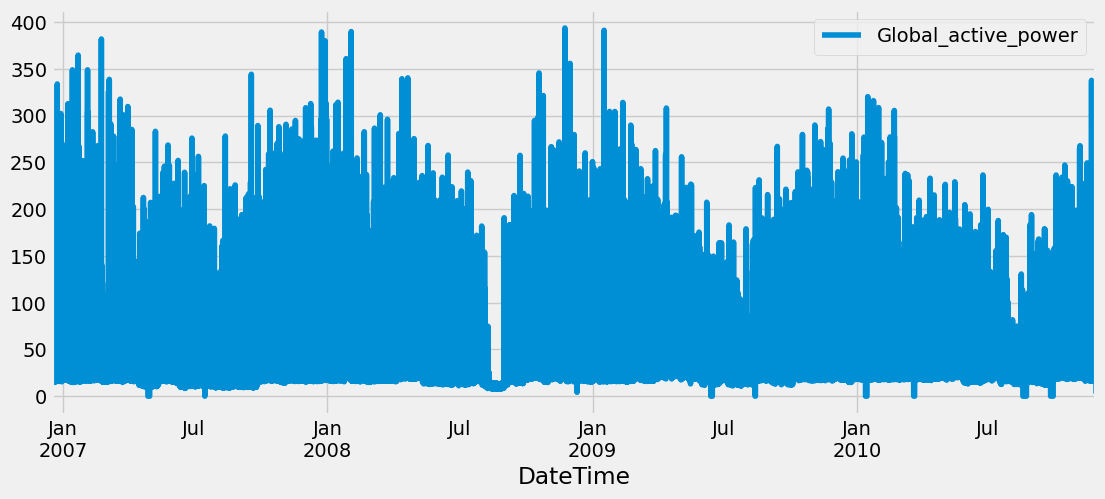

In [166]:
# Resetting the index to something other than DateTime
df = df.reset_index()

# displaying the DataFrame in a graph
df.plot(figsize=(12, 5), x='DateTime', y='Global_active_power')

In [167]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
1,2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2,2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
3,2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
4,2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


In [168]:
# The number of null values in the column 'Global_active_power'
null_count = df['Global_active_power'].isnull().sum()
print(null_count)

0


In [169]:
df = df.rename(columns={'Global_active_power':'Consumption'})

In [170]:
# Replacing the missing values with 0
df['Consumption'].fillna(0,inplace=True)

In [171]:
df.head()

,DateTime,Consumption,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
1,2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2,2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
3,2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
4,2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


In [172]:
df['Consumption'] = df['Consumption'].round(2)
df.head()

,DateTime,Consumption,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,152.02,8.244,8447.18,651.6,0.0,19.0,607.0
1,2006-12-16 18:00:00,217.93,4.802,14074.81,936.0,0.0,403.0,1012.0
2,2006-12-16 19:00:00,204.01,5.114,13993.95,870.2,0.0,86.0,1001.0
3,2006-12-16 20:00:00,196.11,4.506,14044.29,835.0,0.0,0.0,1007.0
4,2006-12-16 21:00:00,183.39,4.600,14229.52,782.8,0.0,25.0,1033.0


In [173]:
# Saving new DataFrame as a csv file (data_household.csv)
headers = ['DateTime','Consumption']
df.to_csv('../data/data_household.csv',columns=headers,index=False)